# This script contains:
1. Import of Libraries and updated data
2. Question 3
3. Question 4
4. Question 5
5. Question 6
6. Question 7
7. Question 8

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Defining Path
path= r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 4/INSTACART BASKET ANALYSIS JULY14-2024'

In [6]:
path

'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 4/INSTACART BASKET ANALYSIS JULY14-2024'

In [8]:
# Import most updated data
df=pd.read_pickle(os.path.join(path,'02 DATA', 'PREPARED DATA','customer_order_product_allclean_mergedfile.pkl'))

In [11]:
df.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2           1  Chocolate Sandwich Cookies        61             19     5.8   
3           1  Chocolate Sandwich Cookies        61             19     5.8   
4           1  Chocolate Sandwich Cookies        61             19     5.8   

   order_id user_id  order_number  order_dow  order_hour_of_day  ...  \
0   3139998     138            28          6                 11  ...   
1   1977647     138            30          6                 17  ...   
2    389851     709             2          0                 21  ...   
3    652770     764             1          3                 13  ...   
4   1813452     764             3          4                 17  ...   

     order_frequency  first name  surname  gender      state age  date_joined  \
0  Frequent customer     Charles      Cox    Male  Minnesota  81     8/1/2019   
1  Frequent customer     Charles      Cox    Male  Minnesota  81     8/1/2019   
2  Frequent customer     Deborah    Glass  Female    Vermont  66    6/16/2018   
3  Frequent customer     Heather    Myers  Female  Wisconsin  40     2/9/2020   
4  Frequent customer     Heather    Myers  Female  Wisconsin  40     2/9/2020   

  number_of_dependents  marital_status  income  
0                    1         married   49620  
1                    1         married   49620  
2                    2         married  158302  
3                    3         married   31308  
4                    3         married   31308  

[5 rows x 31 columns]

In [15]:
df.shape

(32434212, 31)

# Question 3

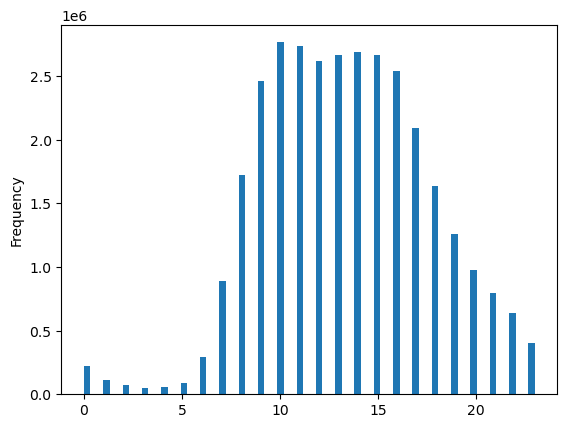

In [20]:
hist=df['order_hour_of_day'].plot.hist(bins=70)

1. 12AM-5AM is the slow hour.
2. 8AM-10AM and 5PM-8PM are moderate hours
3. 10AM-4PM is the rush hour
4. 8PM-12AM is moderately slow hour

# Question 4

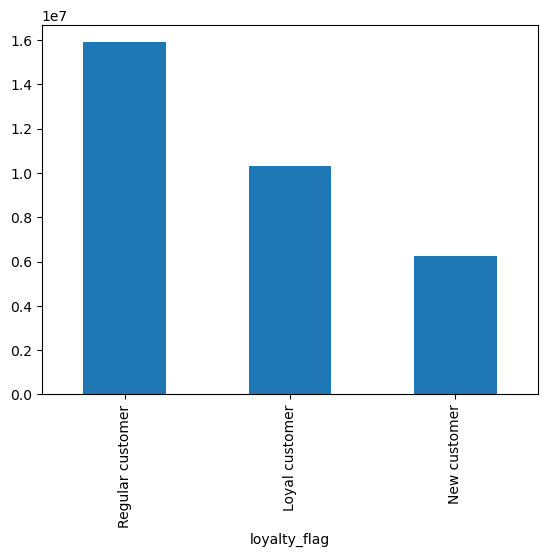

In [26]:
# Creating Bar chart
Bar=df['loyalty_flag'].value_counts().plot.bar()

Maximum number of instacart customers are regular customer, followed by loyal customer and then lastly comes the new customer. Therefore,
the insta cart needs to come up with some idea so that they can increase the inflow of new customers.

# Question 5

In [75]:
# Sampling Data using 70/30 split
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [77]:
dev

array([False,  True, False, ..., False,  True,  True])

In [79]:
# Dividing sampling data into big(70%)
big=df[dev]

In [81]:
# Dividing sampling data into small(30%)
small=df[~dev]

In [83]:
# Checking length of subset data
len(df)

32434212

In [85]:
# checking length of sampling data
len(big)+len(small)

32434212

In [87]:
#Reducing sample to necessary columns
df_small=small[['order_hour_of_day','prices']]

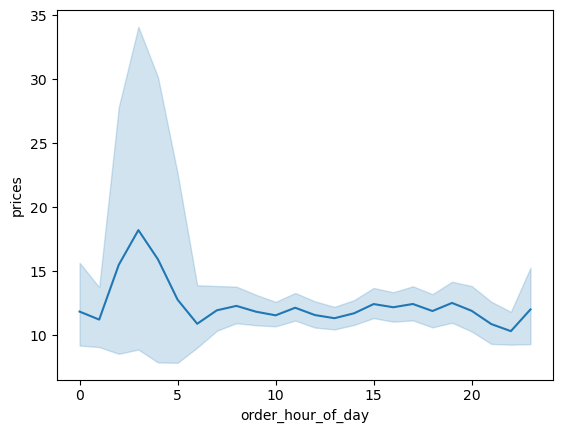

In [89]:
line=sns.lineplot(data=df_small,x='order_hour_of_day',y='prices')

The output shows that the prices are higher during the early morning. 

# Question 6

In [92]:
# Reducing sample to necessary columns
df_demographics=small[['age','number_of_dependents']]

In [96]:
df_demographics.head()

age  number_of_dependents
0    81                     1
2    66                     2
3    40                     3
6    20                     3
10   61                     1

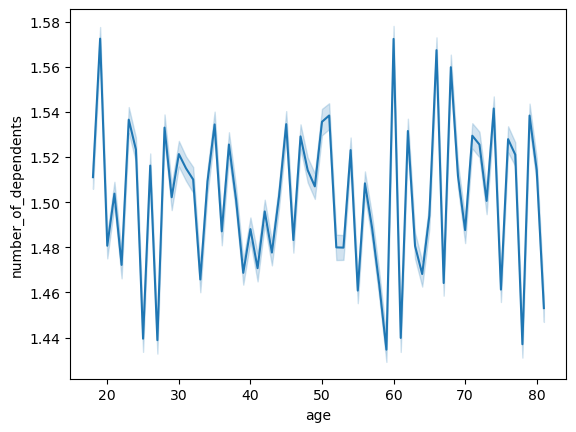

In [100]:
# Creating line chart
line_2=sns.lineplot(data=df_demographics,x='age',y='number_of_dependents')

There is no clear pattern of relation between number_of_dependents and customer's age

# Question 7

In [104]:
# Creating relevant datasets
df_age_income=small[['age','income']]

In [106]:
df_age_income.head()

age  income
0    81   49620
2    66  158302
3    40   31308
6    20   34171
10   61   42573

<Axes: xlabel='age', ylabel='income'>

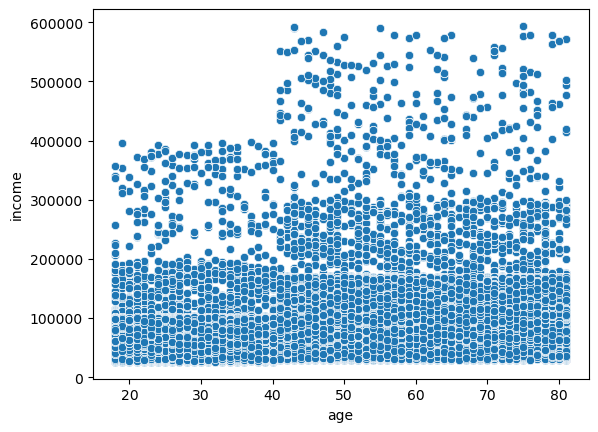

In [109]:
# Creating Scatterplot
sns.scatterplot(x = 'age', y = 'income',data = df_age_income)

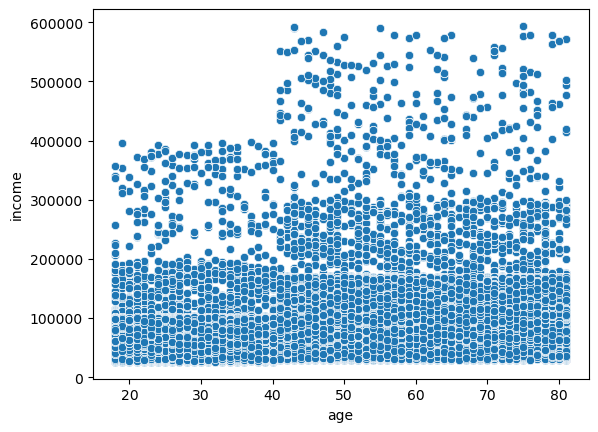

In [123]:
scatter_plot=sns.scatterplot(x = 'age', y = 'income',data = df_age_income)

1. The result shows that majority of the people accross all age has income around 200K.
2. The income do increase beyond 200K, however it is very scatters in case around 20-40 age group.
3. The income is also concentration between 200k-300k among the 40-80 comparetively, which shows the wealth is concentrated among the higher age group customers.
4. The income bracket 400-600k in only found in higher age group people.

# Question 8

In [115]:
Bar.figure.savefig(os.path.join(path, '04 ANALYSIS','VISUALIZATIONS', 'loyalty_flag.png'))

In [125]:
hist.figure.savefig(os.path.join(path, '04 ANALYSIS','VISUALIZATIONS','order_hour_of_day.png'))

In [127]:
line.figure.savefig(os.path.join(path, '04 ANALYSIS','VISUALIZATIONS','price_orderhour_relation.png'))

In [129]:
line_2.figure.savefig(os.path.join(path, '04 ANALYSIS','VISUALIZATIONS','age_numberofdependents_relation.png'))

In [131]:
scatter_plot.figure.savefig(os.path.join(path, '04 ANALYSIS','VISUALIZATIONS','age_spendingpower_relation.png'))